# Test calculation for Confidence Intervals

## Example from the Practical Statistics book Ch. 2, p. 18-19)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t

In [2]:
# use this for the beginning
data = np.array([8,12,10,7,7,11,8])

# use the randm=omly generated data for sample sizes n=7,70,7000 to observe
# how standard error is changing, and the quantiles in the t-distribution
# and the 95% confidence intervals.

#data = norm.rvs(loc=9.0,scale=1.85,size=7000)

m = np.mean(data)
s = np.std(data)
n = np.size(data)
print("The mean and standard deviation of the sample: m=%6.3f s=%6.3f" % (m,s) )


The mean and standard deviation of the sample: m= 9.000 s= 1.852


In [3]:
# standard error of the mean

se= s/np.sqrt(n)

print ("The standard error of the mean is %6.3f" % (se))


The standard error of the mean is  0.700


In [4]:


df=n-1 
q1=t.ppf(0.025,df)
q2=t.ppf(0.975,df)
ci1=m+se*q1
ci2=m+se*q2
print ("q1,q2 %6.3f %6.3f" %(q1, q2))
print ("The mean and the 95 percent confidence range is: m, lower, upper CI: %6.3f %6.3f %6.3f" % (m,ci1,ci2))

q1,q2 -2.447  2.447
The mean and the 95 percent confidence range is: m, lower, upper CI:  9.000  7.288 10.712


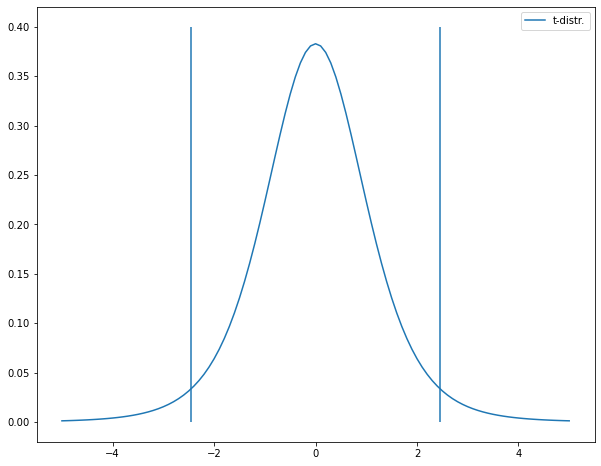

In [11]:
xhelp=np.arange(-5,5.1,0.1)
yhelp=norm.pdf(xhelp)
df=n-1 # degrees of freedom
q1=t.ppf(0.025,df)
q2=t.ppf(0.975,df)
thelp = t.pdf(xhelp,df=df)
plt.figure(figsize=[10,8])
#plt.plot(xhelp,yhelp,label='normal distr.')
plt.plot(xhelp,thelp,label='t-distr.')
plt.vlines(q1,0,0.4)
plt.vlines(q2,0,0.4)
plt.legend()
plt.show()

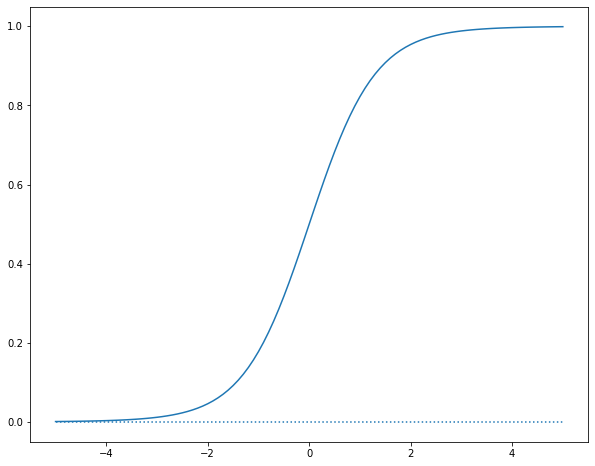

In [6]:
plt.figure(figsize=[10,8])

xhelp=np.arange(-5,5.1,0.1)
df=n-1 # degrees of freedom
yhelp2=t.cdf(xhelp,df=df)
plt.plot(xhelp,yhelp2,label='CDF of t-distr')
plt.hlines(0,-5,5,linestyle='dotted')
plt.show()

In [7]:
df=n-1 # degrees of freedom
q1=t.ppf(0.025,df)
q2=t.ppf(0.975,df)
ci1=m+se*q1
ci2=m+se*q2
print ("q1,q2 %6.3f %6.3f" %(q1, q2))
print ("The mean and the 95 percent confidence range is: m, lower, upper CI: %6.3f %6.3f %6.3f" % (m,ci1,ci2))

q1,q2 -2.447  2.447
The mean and the 95 percent confidence range is: m, lower, upper CI:  9.000  7.288 10.712


In [10]:
ci=se*t.ppf([0.025,0.975],df)
print(ci)

[-1.71248156  1.71248156]


## Summary:

Steps in the calculation of the confidence intervals:

1. Calculate the mean and standard deviation with np.mean and np.std, and have the sample size ready for step 2
2. Calculate the standard error of the mean
3. Decide on the confidence level P (e.g. 95% or 90%)
4. Look up the t-values in the t-distribution:
    - Calculate the degrees of freedom (sample size -1)
    - use the confidence value P (e.g. 95%  is 0.95) and obtain the value 1-P
    - use (1-P)/2 in t.ppf() to find the lower percentile value (e.g. (1-0.95)/2= 0.025 )
    - call the function t.ppf() with the quantile value and correct degrees of freedom
    - same can be done for the upper percentile ( which is the 0.975 percentile for a 95% confidence interval calculation)
   
Note: For the t-distribution, the 0.025 and 0.975 percentiles differ only in the sign, so calcuation of one percentile is sufficient.



    

References: 
 - [Scipy stats packages for normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
 - [Scipy stats packages for 't' distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)